In [15]:
import pandas as pd
import csv
import numpy as np
file1_1 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_cl_RT_value_file.txt", header=None, delimiter=' ')
file3_1 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_cl_RT_value_file.txt", header=None, delimiter=' ')
file1_2 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part5_cl_RT_value_file.txt", header=None, delimiter=' ')
file3_2 = pd.read_csv("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part6_cl_RT_value_file.txt", header=None, delimiter=' ')

for i in [0, 1, 2]:
    file1_1[i] = file1_1[i].astype(int)
    file3_1[i] = file3_1[i].astype(int)
    file1_2[i] = file1_2[i].astype(int)
    file3_2[i] = file3_2[i].astype(int)
    
for i in [3, 4, 5, 6]:
    file1_1[i] = file1_1[i].astype(float)
    file3_1[i] = file3_1[i].astype(float)
    file1_2[i] = file1_2[i].astype(float)
    file3_2[i] = file3_2[i].astype(float)

#file1_1 - mid 1 server 1 -1 -1
#file3_1 = mid 1 server 3 -1  1
#file1_2 = mid 2 server 1  1 -1
#file3_2 = mid 2 server 3  1  1
#w 8 = -1
#w 32 = 1

# -1 -1 -1 
str1 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1 -1  -1
str2 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1  1 -1
str3 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1  1  -1
str4 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1 -1 1
str5 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]
# 1 -1  1
str6 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# -1  1 1
str7 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# 1 1 1
str8 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

y0 = float(str1[3])
y1 = float(str2[3])
y2 = float(str3[3])
y3 = float(str4[3])
y4 = float(str5[3])
y5 = float(str6[3])
y6 = float(str7[3])
y7 = float(str8[3])


I = [1, 1, 1, 1, 1, 1, 1, 1]
A = [-1, 1, -1, 1, -1, 1, -1, 1]
B = [-1, -1, 1, 1, -1, -1, 1, 1]
C = [-1, -1, -1, -1, 1, 1, 1, 1]
AB = [1, -1, -1, 1, 1, -1, -1, 1]
AC = [1, -1, 1, -1, -1, 1, -1, 1]
BC = [1, 1, -1, -1, -1, -1, 1, 1]
ABC = [-1, 1, 1, -1, 1, -1, -1, 1]
y = [y0, y1, y2, y3, y4, y5, y6, y7]
q0 = sum(np.multiply(y, I) / 8)
qA = sum(np.multiply(y, A) / 8)
qB = sum(np.multiply(y, B) / 8)
qC = sum(np.multiply(y, C) / 8)
qAB = sum(np.multiply(y, AB) / 8)
qAC = sum(np.multiply(y, AC) / 8)
qBC = sum(np.multiply(y, BC) / 8)
qABC = sum(np.multiply(y, ABC) / 8)

SSY = 0
for i in [4, 5, 6]:
    SSY += (float(str1[i]) * float(str1[i]) + float(str2[i]) * float(str2[i]) +
            float(str3[i]) * float(str3[i]) + float(str4[i]) * float(str4[i]) +
            float(str5[i]) * float(str5[i]) + float(str6[i]) * float(str6[i]) +
            float(str7[i]) * float(str7[i]) + float(str8[i]) * float(str8[i]))
SSA = 24 * qA * qA
SSB = 24 * qB * qB
SSC = 24 * qC * qC
SSAB = 24 * qAB * qAB
SSAC = 24 * qAC * qAC
SSBC = 24 * qBC * qBC
SSABC = 24 * qABC * qABC
SS0 = 24 * q0 * q0
SST = SSY - SS0
SSE = SST - (SSA + SSB + SSC + SSAB + SSAC + SSBC + SSABC)
print("Percentage middlware=" + str(SSA * 100 / SST))
print("Persentage server=" + str(SSB * 100 / SST))
print("Percentage workers=" + str(SSC * 100 / SST))
print("Percentage middleware+server=" + str(SSAB * 100 / SST))
print("Percentage middleware+workers=" + str(SSAC * 100 / SST))
print("Percentage server+workers=" + str(SSBC * 100 / SST))
print("Percentage of all factors=" + str(SSABC * 100 / SST))
print("Percentage of errors=" + str(SSE * 100 / SST))

print(" 1 middleware, 1 server, 8 workers:\n", float(str1[3]))
print(" 2 middlewares, 1 server, 8 workers:\n", float(str2[3]))
print(" 1 middleware, 3 servers, 8 workers:\n", float(str3[3]))
print(" 2 middlewares, 3 servers: 8 workers:\n", float(str4[3]))
print(" 1 middleware, 1 server, 32 workers:\n", float(str5[3]))
print(" 2 middlewares, 1 server, 32 workers:\n", float(str6[3]))
print(" 1 middleware, 3 servers, 32 workers:\n", float(str7[3]))
print(" 2 middlewares, 3 servers: 32 workers:\n", float(str8[3]))

Percentage middlware=27.277196716439473
Persentage server=0.014974729464608011
Percentage workers=58.40863665669292
Percentage middleware+server=1.1289622193906197
Percentage middleware+workers=9.538662016380577
Percentage server+workers=3.088409688709928
Percentage of all factors=0.5203536686470255
Percentage of errors=0.022804304274835506
 1 middleware, 1 server, 8 workers:
 23.80932319264973
 2 middlewares, 1 server, 8 workers:
 14.47332619222616
 1 middleware, 3 servers, 8 workers:
 29.049388979860268
 2 middlewares, 3 servers: 8 workers:
 14.610457587167952
 1 middleware, 1 server, 32 workers:
 12.006168641893652
 2 middlewares, 1 server, 32 workers:
 9.44149635498221
 1 middleware, 3 servers, 32 workers:
 10.155595853353141
 2 middlewares, 3 servers: 32 workers:
 6.614977323518032


In [16]:
for i in [4, 5, 6]:
    file1_1[i] = file1_1[i] - file1_1[3]
    file3_1[i] = file3_1[i] - file3_1[3]
    file1_2[i] = file1_2[i] - file1_2[3]
    file3_2[i] = file3_2[i] - file3_2[3]
    
str1 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1 -1  -1
str2 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1  1 -1
str3 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]
# 1  1  -1
str4 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 8)]

# -1 -1 1
str5 = file1_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]
# 1 -1  1
str6 = file1_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# -1  1 1
str7 = file3_1[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

# 1 1 1
str8 = file3_2[(file1_1[2] == 32) &
                 (file1_1[1] == 256) & 
                 (file1_1[0] == 32)]

print(str1)

   0    1   2          3         4         5         6
7  8  256  32  23.809323  0.154566 -0.352984  0.198418


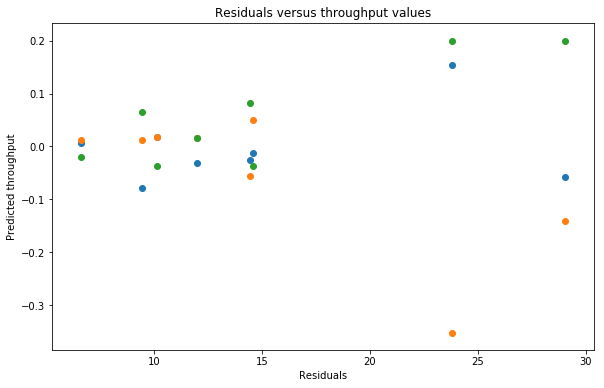

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([float(str1[4]), float(str2[4]), float(str3[4]), float(str4[4]), 
     float(str5[4]), float(str6[4]), float(str7[4]), float(str8[4])])
x2 = np.array([float(str1[5]), float(str2[5]), float(str3[5]), float(str4[5]), 
     float(str5[5]), float(str6[5]), float(str7[5]), float(str8[5])])
x3 = np.array([float(str1[6]), float(str2[6]), float(str3[6]), float(str4[6]), 
     float(str5[6]), float(str6[6]), float(str7[6]), float(str8[6])])

y = np.array([y0, y1, y2, y3, y4, y5, y6, y7])

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(y, x1)
plt.scatter(y, x2)
plt.scatter(y, x3)
plt.title('Residuals versus throughput values')
plt.tight_layout(0)
plt.xlabel('Residuals')
plt.ylabel('Predicted throughput')
plt.savefig("additive_residuals_response.pdf")

plt.show()
#errors negligible, this is not a concern
#page 190 for mean
#problem with 8 woker threads and 1,3 servers - 

[-0.35298405 -0.14134175 -0.07764044 -0.05789888 -0.05569228 -0.03772941
 -0.03639517 -0.03119689 -0.02615123 -0.01955801 -0.01146576  0.00646244
  0.01161761  0.01309557  0.01546775  0.01572914  0.01810256  0.01829262
  0.04919518  0.06602283  0.08184351  0.15456562  0.19841843  0.19924063]


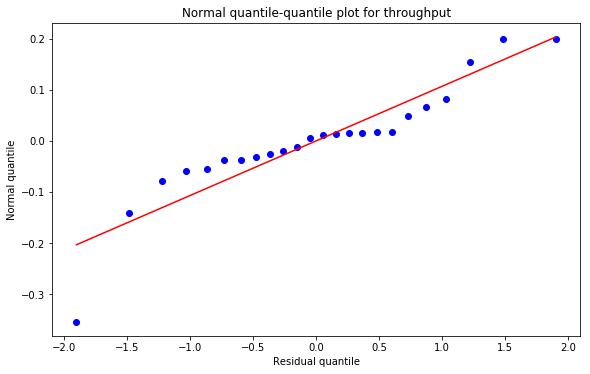

In [18]:
x = np.concatenate((x1, x2, x3), axis=None)
x = np.sort(x, axis=None)  
print(x)
import pylab 
import scipy.stats as stats

pylab.figure(figsize=(8, 5))
stats.probplot(x, dist="norm", plot=pylab)
pylab.title("Normal quantile-quantile plot for throughput")
pylab.xlabel("Residual quantile")
pylab.ylabel("Normal quantile")
pylab.tight_layout(0)
pylab.savefig("additive_quantile_response.pdf")
pylab.show()